In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, norm, shapiro, ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multitest import multipletests

import seaborn as sns




In [82]:
#df = pd.read_csv('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\Phe_CvT\\Para_Scores.csv')#, sheet_name = "Sheet1")
#MCR_CtrlvTrt\\Para_Scores_Summary.xlsx
#df = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\Phe_CvT\\Orth_Scores_Ldgs.xlsx', sheet_name='Scores') 
df = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\Phe_CvT\\Para_Scores.xlsx', sheet_name='Sheet1') 
df.head()

,sample,sample1,trt_time,Scores on Comp 2 (16.16%),Scores on Comp 3 (72.38%),Scores on Comp 4 (9.14%)
0,Ctrl,Control,20mins,0.010710,0.023410,0.006529
1,Ctrl,Control,20mins,0.011956,0.027149,0.004772
2,Ctrl,Control,20mins,0.004669,0.032320,0.010738
3,Ctrl,Control,20mins,0.020306,0.010525,0.009614
4,Ctrl,Control,20mins,0.014931,0.014209,0.009699


In [70]:

data = []
for x in ['2mins','20mins', '40mins', '60mins']:
    dff = df[df['trt_time'].str.contains(x)]
    print(f"{shapiro(dff['Scores on Comp 3 (52.75%)'])[1]}")
    tukey = pairwise_tukeyhsd(endog=dff['Scores on Comp 3 (52.75%)'],
                              #dff['Scores on Comp 3 (52.75%)'], dff['Scores on Comp 2 (16.16%)']
                            groups=dff['sample'],
                            alpha=0.05
                            )
    #display results
    #print(f"Results for {x}")
    #print(tukey)
    #print('*****************************************************')
    data.append(pd.DataFrame(tukey.summary().data[1:], columns = tukey.summary().data[0]))

0.344840508587232
0.48358562430763113
0.012842827901046013
0.8532854137078929


In [71]:
stat_results = pd.concat(data).reset_index(drop=True).iloc[:13, :]
stat_results.insert(7, 'sig', value = ['**' if x < 0.01 else ('*' if x<0.05  else 'ns') for x in stat_results['p-adj']])
stat_results#.head()

,group1,group2,meandiff,p-adj,lower,upper,reject,sig
0,Ctrl,Trt,0.0072,0.0000,0.0046,0.0099,True,**
1,Ctrl,Trt,0.0040,0.0000,0.0023,0.0058,True,**
2,Ctrl,Trt,0.0028,0.0831,-0.0004,0.0059,False,ns
3,Ctrl,Trt,0.0035,0.0003,0.0016,0.0053,True,**


In [241]:
df['trt_time'].unique()

array(['20mins', '24h', '2mins', '40mins', '60mins'], dtype=object)

In [22]:
df

,sample,sample1,trt_time,Scores on Comp 2 (16.16%),Scores on Comp 3 (72.38%),Scores on Comp 4 (9.14%)
0,Ctrl,Control,20mins,0.010710,0.023410,0.006529
1,Ctrl,Control,20mins,0.011956,0.027149,0.004772
2,Ctrl,Control,20mins,0.004669,0.032320,0.010738
3,Ctrl,Control,20mins,0.020306,0.010525,0.009614
4,Ctrl,Control,20mins,0.014931,0.014209,0.009699
...,...,...,...,...,...,...
232,Trt,Cross-Linked,40mins,0.007761,0.024281,0.007147
233,Trt,Cross-Linked,40mins,0.012551,0.015813,0.006586
234,Trt,Cross-Linked,40mins,0.012276,0.018645,0.008553
235,Trt,Cross-Linked,40mins,0.011567,0.014542,0.010376


C:\Users\oadeji01\AppData\Local\Temp\ipykernel_21044\3972951059.py:88: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = '', frameon = False, fontsize = 4)#, labels=['Control', 'Cross-Linked']


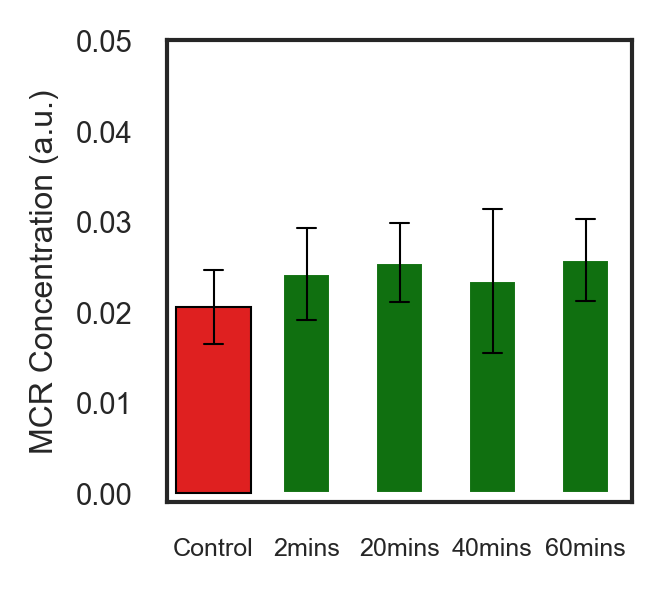

In [79]:
#df[df['trt_time'].isin(['2mins', '20mins', '40mins', '60mins'])]
sns.set_theme(context = 'paper', font_scale = .8, style = 'white', rc={"patch.linewidth": 1.0})
plt.figure(figsize = (2, 2), dpi = 300);


'''sns.stripplot(
    x = 'sample1',
    y = 'Scores on Comp 2 (16.16%)',
    data = df[df['sample1'] == 'Control'],
    #hue = 'sample1',
    #order = ['2mins', '20mins','40mins', '60mins'],
       linewidth = .5,
       dodge=True,
       color = 'red',
       edgecolor='black',
    size = 2,
);'''
'''sns.stripplot(
    x = 'trt_time',
    y = 'Scores on Comp 2 (16.16%)',
    data = df[df['sample1'] == 'Cross-Linked'],
    #hue = 'sample1',
    order = ['2mins', '20mins','40mins', '60mins'],
       linewidth = .5,
       dodge=True,
       color = 'green',
    size = 2,
);'''
#4 (9.14%)
sns.barplot(
    x = 'sample1',
    y = 'Scores on Comp 3 (52.75%)',
    data = df[df['sample1'] == 'Control'],
    #hue = 'sample1',
    #order = ['2mins', '20mins','40mins', '60mins'],
       linewidth = .5,
       #linecolor = 'black',
       #dodge=True,
       #width = .5,
    #showfliers = False,
   #boxprops=dict(alpha=0.8),
    legend = False,
    color = 'red',
    errorbar='sd', estimator='mean',
    capsize = .2,
    edgecolor = 'black',
    err_kws={'linewidth': .5, 'color': 'black'}
    #fill = False
);
sns.barplot(
    x = 'trt_time',
    y = 'Scores on Comp 3 (52.75%)',
    data = df[df['sample1'] == 'Cross-Linked'],
    #hue = 'sample1',
    order = ['2mins', '20mins','40mins', '60mins'],
       linewidth = .5,
       #linecolor = 'black',
       #dodge=True,
       color = 'green',
       width = .5,
    #showfliers = False,
   #boxprops=dict(alpha=0.8),
    legend = False,
    errorbar='sd', estimator='mean',
    capsize = .2,
    err_kws={'linewidth': .5, 'color': 'black'}

    #fill = False
);
'''sns.boxplot(
    x = 'trt_time',
    y = 'Scores on Comp 2 (16.16%)',
    data = df[df['sample1'] == 'Cross-Linked'],
    #hue = 'sample1',
    order = ['2mins', '20mins','40mins', '60mins'],
       linewidth = .5,
       dodge=True,
       color = 'green',
       #palette = ['red','green'],
       width = .3,
    showfliers = False,
   # boxprops=dict(alpha=0.8),
    legend = False
    #fill = False
);'''
plt.xlabel('')
plt.ylabel('MCR Concentration (a.u.)')
plt.legend(title = '', frameon = False, fontsize = 4)#, labels=['Control', 'Cross-Linked']
plt.ylim(-0.001, .05)
plt.xticks(fontsize = 6)


#plt.xticks([0.3]) 
#ax.set_xticks(positions)
#plt.axvline(-0.25)
'''for l in [1.5, 3.5, 5.5, 7.5]:
    plt.axvline(l, ls = '--', color = 'maroon', lw = .5)'''
plt.savefig(f'C:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Reports\\Paper\\Figures\\MCR_Scores_Orth_CvOthers_barplot.tif', dpi = 600, bbox_inches='tight')

In [24]:
dff[dff['sample'] == 'Ctrl']['Scores on Comp 2 (16.16%)']

24     0.007090
25     0.007737
26     0.009648
27     0.009590
28     0.022333
29     0.018815
54     0.013603
55     0.013629
56     0.009651
57     0.008399
58     0.010775
59     0.011076
84     0.010993
85     0.011983
86     0.010860
87     0.011663
88     0.010461
89     0.011046
115    0.007355
116    0.013056
117    0.013997
118    0.010918
119    0.008671
120    0.009226
148    0.013933
149    0.008524
150    0.005738
151    0.015503
152    0.011786
153    0.011995
154    0.014426
Name: Scores on Comp 2 (16.16%), dtype: float64

In [83]:
pvals = []
stats = []

for x in ['2mins','20mins', '40mins', '60mins', '24h']:
    dff = df[df['trt_time'].str.contains(x)]
    ctrl = dff[dff['sample'] == 'Ctrl']['Scores on Comp 4 (9.14%)'].dropna()
    #orth = ['Scores on Comp 3 (52.75%)'].dropna()
    # #para = ['Scores on Comp 4 (9.14%)'].dropna()
    trt = dff[dff['sample'] == 'Trt']['Scores on Comp 4 (9.14%)'].dropna()

    tstat, p = ttest_ind(ctrl, trt, equal_var=False, alternative='two-sided')
    pvals.append(p)
    stats.append(tstat)


In [84]:
reject, pvals_corr, _, _ = multipletests(
    pvals,
    alpha=0.05,
    method='holm-sidak'
)
results = pd.DataFrame({
    'time': ['2mins','20mins', '40mins', '60mins', '24h'],
    't_stat': stats,
    'p_raw': pvals,
    'p_holm_sidak': pvals_corr,
    'significant': reject
})

print(results)
#print(reject, pvals_corr)

     time    t_stat     p_raw  p_holm_sidak  significant
0   2mins  1.985389  0.056519      0.072546        False
1  20mins -3.511551  0.000990      0.003918         True
2  40mins -3.651626  0.000981      0.003918         True
3  60mins -2.210406  0.036956      0.072546        False
4     24h -4.209966  0.000250      0.001250         True


In [55]:
# for unequal variances
import pingouin as pg
data1 = []
for x in ['2mins','20mins', '40mins', '60mins', '24h']:
    dff = df[df['trt_time'].str.contains(x)]
    print(f"Test of normality: p-value = {shapiro(dff['Scores on Comp 3 (52.75%)'])[1]}, pval <= .05 is non-normal")
    tukey = pg.pairwise_tukey(
        data = dff,
        dv='Scores on Comp 3 (52.75%)',
                            between='sample',
                            effsize = 'AUC'
                            )#.round(3)
    tt = pg.ttest(
    df[df['sample'] == 'Ctrl']['Scores on Comp 3 (52.75%)'],
        dff[dff['sample'] == 'Trt']['Scores on Comp 3 (52.75%)'],
        paired = False,
        correction = 'auto',
        confidence = .95
        )
    #display results
    print(f"Results for {x}")
    print(tt)
    print('///////////////////////')
    #print(tukey)
    print('*****************************************************')
    data1.append(tukey)

Test of normality: p-value = 0.344840508587232, pval <= .05 is non-normal
Results for 2mins
               T        dof alternative     p-val          CI95%   cohen-d  \
T-test -3.836026  39.841418   two-sided  0.000436  [-0.01, -0.0]  0.854665   

           BF10     power  
T-test  132.656  0.992213  
///////////////////////
*****************************************************
Test of normality: p-value = 0.48358562430763113, pval <= .05 is non-normal
Results for 20mins
               T        dof alternative         p-val          CI95%  \
T-test -5.837905  41.535708   two-sided  7.046909e-07  [-0.01, -0.0]   

         cohen-d       BF10     power  
T-test  1.189022  4.268e+05  0.999975  
///////////////////////
*****************************************************
Test of normality: p-value = 0.012842827901046013, pval <= .05 is non-normal
Results for 40mins
               T        dof alternative    p-val         CI95%  cohen-d  \
T-test -1.992049  33.249416   two-sided  0.05463

### Loadings Plot

In [20]:
ldgs = pd.read_excel('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\Phe_CvT\\Orth_Scores_Ldgs.xlsx', sheet_name='Ldgs') #Para_Ldgs1.xlsx', sheet_name='Sheet1'Orth_Scores_Ldgs.xlsx', sheet_name='Ldgs'
ldgs.head()

,Trt,Comp. 1 (0.86%),Comp. 2 (63.61%),Comp. 3 (3.32%),Comp. 4 (31.78%),Unnamed: 5,Ctrl,Comp. 1 (5.46%),Comp. 2 (8.19%),Comp. 3 (52.75%),Comp. 4 (33.35%),Unnamed: 11,Unnamed: 12,Collagen diff,Coll+glass diff,AR_Trt,AR_Ctrl
0,753.117,0.011190,0.011376,0.010163,0.005218,NaN,753.117,0.011190,0.018821,0.007573,0.006864,NaN,753.117,0.003803,-0.001646,2.241058,1.326697
1,754.260,0.011327,0.013110,0.010534,0.005429,NaN,754.260,0.011327,0.018491,0.010091,0.006934,NaN,754.260,0.003019,-0.001505,1.944603,1.350378
2,755.404,0.011498,0.014668,0.010902,0.005613,NaN,755.404,0.011498,0.018192,0.012379,0.006976,NaN,755.404,0.002290,-0.001363,1.738061,1.372565
3,756.546,0.011668,0.016050,0.011265,0.005770,NaN,756.546,0.011668,0.017924,0.014437,0.006990,NaN,756.546,0.001614,-0.001220,1.588416,1.393063
4,757.688,0.011864,0.017256,0.011625,0.005901,NaN,757.688,0.011864,0.017688,0.016264,0.006977,NaN,757.688,0.000992,-0.001076,1.477435,1.411690


In [21]:
spec = ldgs[['Comp. 2 (63.61%)', 'Comp. 3 (52.75%)']]
spec.head()

,Comp. 2 (63.61%),Comp. 3 (52.75%)
0,0.011376,0.007573
1,0.013110,0.010091
2,0.014668,0.012379
3,0.016050,0.014437
4,0.017256,0.016264


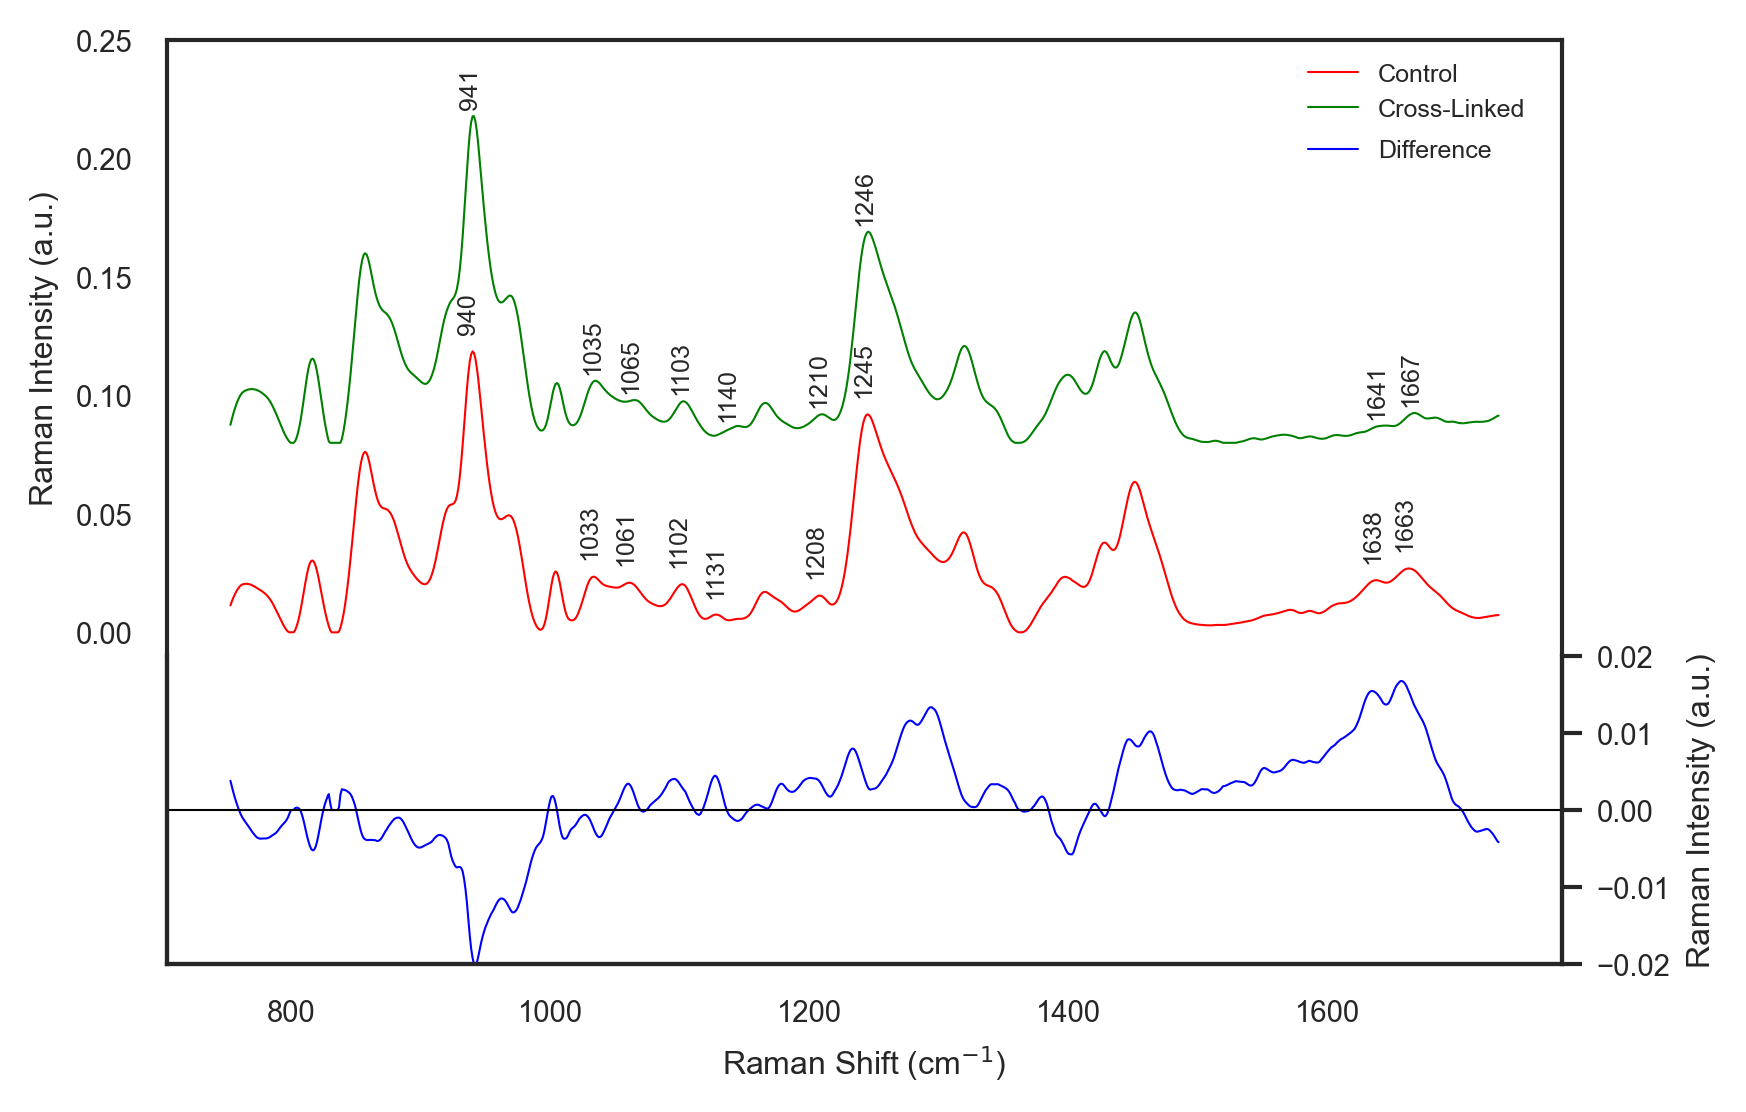

In [40]:
#plt.figure(figsize = (8, 4), dpi = 300)
fig, axes = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(6, 4),
    sharex=True,
    gridspec_kw={"hspace": 0.00, 'height_ratios': [2, 1]},
    dpi = 300
)

ax1, ax2= axes
sns.lineplot(
    x = 'Ctrl',
    y =  'Comp. 2 (63.61%)',#'Comp. 4 (9.14%)',
    data = ldgs,
    label = 'Control',
    color = 'red',
    lw = .5,
    ax = ax1
)
sns.lineplot(
    x = 'Ctrl',
    y = ldgs['Comp. 3 (52.75%)'] + .08,
    data = ldgs,
    label = 'Cross-Linked',
    color = 'green',
    lw = .5,
    ax = ax1
)
ax2_r = ax2.twinx()
sns.lineplot(
    x = 'Ctrl',
    y = ldgs['Collagen diff'], #- 1.02,
    data = ldgs,
    label = 'Difference',
    color = 'blue',
    lw = .5,
      ax = ax2_r
)

ax2.yaxis.set_visible(False)
ax2_r. set_ylim(-.02, .02)
ax2_r.set_ylabel('Raman Intensity (a.u.)')
ax2_r.axhline(0, lw = .5, color = 'black')
ax2_r.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_xlabel("Raman Shift (cm$^{-1}$)")

ax1.set_ylabel('Raman Intensity (a.u.)')
ax1.set_ylim(-.01, .25)
ax1.spines['bottom'].set_visible(False)

ax1.legend(frameon = False, fontsize = 6, bbox_to_anchor  =(.99, 1))
ax2_r.legend(frameon = False, bbox_to_anchor  =(.9655, 2.75), fontsize = 6)


ctrs = [940, 1033, 1062, 1100, 1135, 1207, 1245,  1636, 1663]#816, 857, 876, 921,  1003, 1270,
#857,985,1321, 1360, 1405, 1426, 1451,1265, 1167, 
for c in ctrs:
    for b in [0, 1]:
        mask = (ldgs['Trt'] >= c - 5) & (ldgs['Trt'] <= c + 6)

        loc_idx = ldgs['Trt'][mask]
        peak_idx = spec.iloc[:, b][mask]

        idx_max = np.argmax(peak_idx)
        peak_wl = loc_idx.values[idx_max]
        int_val = peak_idx.values[idx_max]
                #print(int_val)
        if b == 0:
            ax1.text(peak_wl+6, int_val + .0095,#.3 * (len(sub) + 0.3),
            f'{peak_wl:.0f}', rotation=90, fontsize=6, ha='right')
        else:
            ax1.text(peak_wl+6, int_val + .085, #* (len(sub) + 0.3),
                f'{peak_wl:.0f}', rotation=90, fontsize=6, ha='right')
plt.savefig(f'C:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Reports\\Paper\\Figures\\MCR_Ldgs_Orth.tif', dpi = 600, bbox_inches='tight')

In [188]:
# for unequal variances
import pingouin as pg
data1 = []
for x in ['2mins','20mins', '40mins', '60mins', '24h']:
    dff = df[df['trt_time'].str.contains(x)]
    print(f"{shapiro(dff['Scores on Comp 2 (16.16%)'])[1]}")
    tukey = pg.pairwise_gameshowell(
        data = dff,
        dv='Scores on Comp 2 (16.16%)',
                            between='sample'
                            ).round(3)
    #display results
    print(f"Results for {x}")
    print(tukey)
    print('*****************************************************')
    data1.append(tukey)

KeyError: 'Scores on Comp 2 (16.16%)'

In [78]:
gh_stats = pd.concat(data1)
gh_stats.insert(10, 'sig', value = ['**' if x < 0.01 else ('*' if x<0.05  else 'ns') for x in gh_stats['pval']])

In [79]:
gh_stats

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges,sig
0,Ctrl,Trt,0.561,0.327,0.234,0.021,11.220,53.551,0.000,2.859,**
1,Ctrl,Trt_24h,0.561,0.493,0.068,0.024,2.887,48.595,0.016,0.736,*
2,Trt,Trt_24h,0.327,0.493,-0.166,0.026,-6.379,56.301,0.000,-1.626,**
0,Ctrl,Trt,0.606,0.345,0.261,0.019,13.717,56.319,0.000,3.406,**
1,Ctrl,Trt_24h,0.606,0.521,0.086,0.032,2.708,51.027,0.025,0.648,*
2,Trt,Trt_24h,0.345,0.521,-0.175,0.030,-5.842,43.563,0.000,-1.379,**
0,Ctrl,Trt,0.622,0.325,0.297,0.025,12.026,47.742,0.000,3.108,**
1,Ctrl,Trt_24h,0.622,0.530,0.092,0.021,4.295,64.461,0.000,1.004,**
2,Trt,Trt_24h,0.325,0.530,-0.205,0.027,-7.616,57.605,0.000,-1.887,**
0,Ctrl,Trt,0.651,0.363,0.288,0.021,13.833,58.999,0.000,3.495,**


In [87]:
df = pd.read_csv('c:\\Users\\oadeji01\\OneDrive - Tufts\\Bunmi - NavehLab-01\\Raman_Bunmi\\Master_Data\\MCR\\MCR_CvT2\\Para_Scores.csv')#, sheet_name = "Sheet1")
#MCR_CtrlvTrt\\Para_Scores_Summary.xlsx
df.head()

,Label,Label.1,sample,trt_time,orient,spectra_num,details,Class,Scores on Comp 1 (3.16%),Scores on Comp 2 (35.28%),Scores on Comp 3 (10.33%),Scores on Comp 4 (49.93%),Q Residuals (1.30%),Q Residuals Reduced (p=0.950) (1.30%),KNN Score Distance (k=3)
0,NaN,20250616,Ctrl,20mins,Para,1,0616-Ctrl-20mins-Para,Ctrl,0.000194,0.578266,0.030310,0.391230,2.074749,0.274836,0.046902
1,NaN,20250616,Ctrl,20mins,Para,2,0616-Ctrl-20mins-Para,Ctrl,0.000180,0.525329,0.026295,0.448196,0.871580,0.115456,0.028521
2,NaN,20250616,Ctrl,20mins,Para,3,0616-Ctrl-20mins-Para,Ctrl,0.000300,0.427942,0.026830,0.544928,3.370301,0.446453,0.080342
3,NaN,20250616,Ctrl,20mins,Para,4,0616-Ctrl-20mins-Para,Ctrl,0.000235,0.465124,0.014162,0.520479,1.126241,0.149190,0.061708
4,NaN,20250616,Ctrl,20mins,Para,6,0616-Ctrl-20mins-Para,Ctrl,0.000222,0.312003,0.026229,0.661545,0.885682,0.117324,0.064830


In [88]:
tukey = pairwise_tukeyhsd(endog=df['Scores on Comp 2 (35.28%)'],
                            groups=df['Class'],
                            alpha=0.05
                            )
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  Ctrl    Trt  -0.0406 0.0003 -0.0622 -0.019   True
---------------------------------------------------
